# **Expenses Dataset - EDA and ML modelling** 

## TASKS:
### Take a look into this dataset.
1. Perform EDA taking consideration of all the important parameters. Consider different perspectives while performing EDA.
   You can use any tool for the purpose, but make sure that every analysis should be backed with a brief explanation in words about it.

2. Also create a ML model for predicting the prices as well. Try it using different models and finally choose the one which you find fits the use case well.


## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings 
warnings.filterwarnings('ignore')

## Importing the dataset into python notebook

In [2]:
expenses = pd.read_csv("Expenses.csv")

## Printing the first few lines of the dataset
expenses.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


## **Exploratory Data Analysis**

In [3]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observations from the above result:
- There are 1338 rows of records and no null-values (missing values) in the dataset. 
- The dependent variable is 'charges' which is dependent on 6 independent varaiables such as age, bmi, sex, no. of children, region and whether a person is a smoker or not.  

In [4]:
expenses.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422346
std,14.049960,6.098187,1.205493,12110.011277
min,18.000000,15.960000,0.000000,1121.874000
25%,27.000000,26.296250,0.000000,4740.287000
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


### From the above result we can observe that:
- The range of **"charges"** in the dataset varies **from 1,121.87 to 63,770.43**
- The dataset has data of individuals who are amoung the **age of 18 to 64** having **0 to 5 children**
- The **average BMI** of individuals in the dataset is **30.6** and the **average charges(expenses)** in the dataset is **13,270**

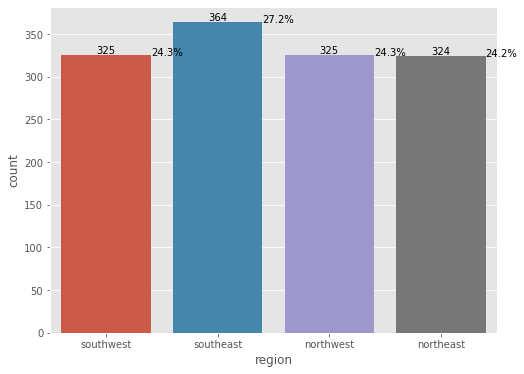

In [5]:
## Let's check the spread of data with respect to region

plt.figure(figsize=(8,6))

ax = sns.countplot('region', data = expenses)
for counts in ax.containers:
    ax.bar_label(counts) 

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/(float(len(expenses))))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y))
plt.show()

### From the above count plot we can see that there is not much bias in the distribution of data records with respect to the region. Although the no. records from the southeast is region is slightly higher than the other regions.

In [6]:
## Let's try to visualise the same using pie chart

region = expenses['region'].value_counts().to_frame()
region

,region
southeast,364
southwest,325
northwest,325
northeast,324


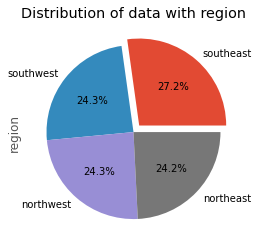

In [7]:
plot = region.plot.pie(y='region', title="Distribution of data with region", legend = False, explode=(0.1, 0, 0, 0),autopct='%1.1f%%')

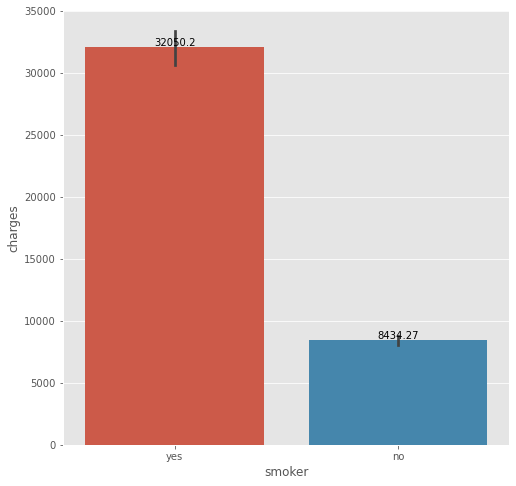

In [8]:
## Visualising the average charges(expenses) of smokers vs non-smokers

plt.figure(figsize=(8,8))

ax = sns.barplot(x ='smoker', y ='charges', data = expenses, estimator = np.mean)
for counts in ax.containers:
    ax.bar_label(counts)

### From the above bar plot we can clearly see that the average charges(expenses) of smokers is far more than the average charges(expenses) of non-smokers. 

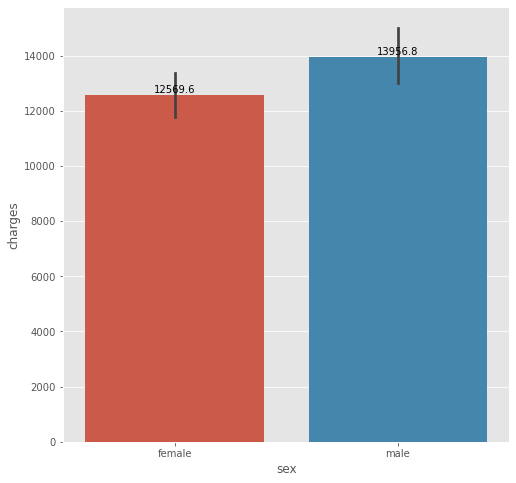

In [9]:
## Similarly, Visualising the average charges(expenses) with respect to sex

plt.figure(figsize=(8,8))

ax = sns.barplot(x ='sex', y ='charges', data = expenses, estimator = np.mean)
for counts in ax.containers:
    ax.bar_label(counts)

### From the above bar plot we can clearly see that the average charges(expenses) of **male** is **more than** the average charges(expenses) of **female** individuals. 

<Figure size 1440x576 with 0 Axes>

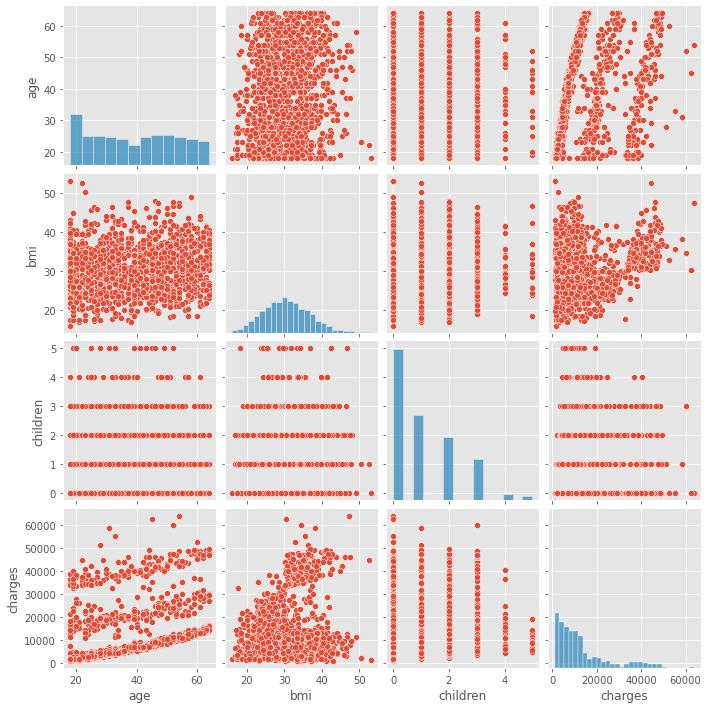

In [10]:
## Visualising the correlation between variables

plt.figure(figsize=(20,8))
sns.pairplot(expenses, vars=['age','bmi','children','charges'])

### There seems to be a positive correlation between **"age" and "charges"** and a slight positive correlation between **"bmi" and "charges"**

<AxesSubplot:>

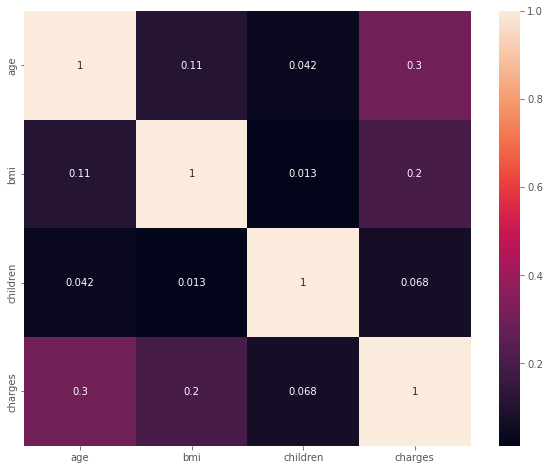

In [11]:
## Visualising the same with heatmap

plt.figure(figsize=(10,8))
sns.heatmap(expenses.corr(), annot=True) 

In [ ]:
## Visualising the relation between age and bmi to charges

sns.set_style("darkgrid")
f, ax = plt.subplots(2, figsize=(8,10))

sns.lineplot(data=expenses, x='age', y='charges',ax=ax[0])
ax[0].set_title('Age Vs Charges')

sns.lineplot(data=expenses, x='bmi', y='charges',ax=ax[1])
ax[1].set_title('BMI Vs Charges')

### From the above visualisations, it is clear that there is a positive correlation between **"age" and "charges"** and a slight positive correlation between **"bmi" and "charges"**

## **Data Modelling**

In [ ]:
# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
## Encoding the categorical variables:

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
expenses.sex = labelencoder_Y.fit_transform(expenses.sex)
expenses.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
expenses.smoker = labelencoder_Y.fit_transform(expenses.smoker)
expenses.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
expenses.region = labelencoder_Y.fit_transform(expenses.region)
expenses.head()

In [ ]:
# Define the x (input) and y (target) features

x = expenses.drop("charges", axis=1)
y = expenses["charges"]

In [ ]:
# Rescale the input features

scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [ ]:
## Train and Test Split
# Split into train (2/3) and test (1/3) sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# Build some models and check them against training data using MAE, RMSE and R2

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

models = [LinearRegression(), KNeighborsRegressor()]
for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_train)
    print(type(model).__name__)
    print(" MAE", mean_absolute_error(y_train, predictions))
    print(" RMSE", np.sqrt(mean_squared_error(y_train, predictions)))

## Interpretation:
### The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.
- **Mean Absolute Error (MAE):** MAE is more robust to data with outliers, A value of 0 indicates a perfect fit.
- **Root Mean Square Error (RMSE):** RMSE penalizes larger errors more severely than MAE. A value of 0 indicates a perfect fit.
#### Note: If comparing the prediction accuracy among different linear regression models then RMSE is a better option as it is simple to calculate and differentiable. However, if your dataset has outliers then choose MAE over RMSE.